## Convex Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In finance and economics, <code>convex optimization</code> plays an important role. Examples are the calibration of option pricing models to market data or the optimization of an agent’s utility. As an example function that we want to minimize, we take fm, as defined in the following:

In [2]:
def fm(x, y):
    return (np.sin(x) + 0.05 * x ** 2
            + np.sin(y) + 0.05 * y ** 2)

In [3]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)

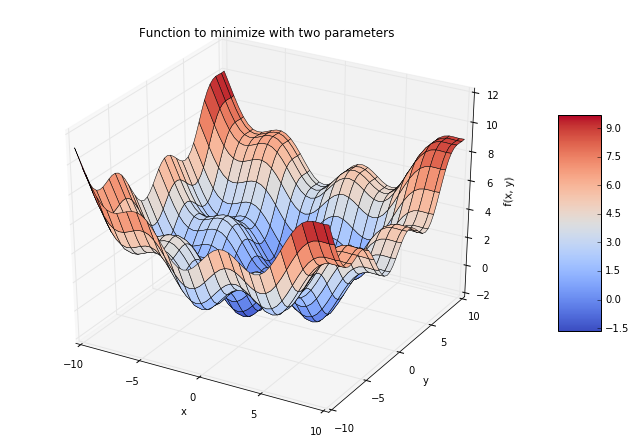

In [4]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))

ax = Axes3D(fig)

surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap=mpl.cm.coolwarm,
                       linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Function to minimize with two parameters')

We want to implement both a <code>global</code> minimization approach and a <code>local</code> one. The functions <code>brute</code> and <code>fmin</code> that we want to use can be found in the sublibrary <code>scipy.optimize</code>:

In [5]:
import scipy.optimize as spo

_Convex Optimization_ >
### Global Optimization

When we initiate the minimization procedures, we amend the original function by an option to output current parameter values as well as the function value:

In [6]:
def fo(xy):
    x, y = xy
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2 
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z)) 
    return z

<code>brute</code> takes the parameter ranges as input. For example, providing parameter range (-10, 10.1, 5) for the x value will lead to “tested” values of -10, -5, 0, 5, 10:

In [7]:
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

The optimal parameter values, given the initial parameterization of the function, are x = y = 0. The resulting function value is also 0. The first parameterization here is quite rough.

In [8]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [9]:
fo(tuple(opt1))

-1.7748994599769203

_Convex Optimization_ >
### Local Optimization

For the local convex optimization we want to draw on the results from the global optimization. The function <code>fmin</code> takes as input the function to minimize and the starting parameter values. In addition, you can define levels for the input parameter tolerance and the function value tolerance, as well as for the maximum number of iterations and function calls: 

In [10]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [11]:
fo(opt2)

 -1.4270  -1.4288  -1.7757


-1.7757246992239009

For many convex optimization problems it is advisable to have a global minimization before the local one. 

Local convex optimization algorithms can easily be trapped in a local minimum (or do “basin hopping”), ignoring completely “better” local minima and/or a global minimum. The following shows that setting the starting parameterization to x = y = 2 gives a “minimum” value of above zero:

In [12]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

_Convex Optimization_ >
### Constrained Optimization

So far, we have only considered unconstrained optimization problems. However, large classes of economic or financial optimization problems are constrained by one or multiple constraints. 

Consider the utility maximization problem of an (expected utility maximizing) investor who can invest in two risky securities. Both securities cost $q_{a} = q_{b} =
10$ today. After one year, they have a payoff of 15 USD and 5 USD, respectively, in state $u$, and of 5 USD and 12 USD, respectively, in state $d$. Both states are equally likely. Denote the vector payoffs for the two securities by $r_{a}$ and $r_{b}$, respectively.

The investor has a budget of $w_{0}$ = 100 USD to invest and derives utility from future wealth according to the utility function $u(w) = \sqrt{w}$  , where $w$ is the wealth (USD amount) available. 

**Equation 2**. _Expected utility maximizing problem_

$$ \max_{a,b}E(u(w_{1})) = p\sqrt{w_{1u}} + (1- p)\sqrt{w_{1d}}$$
$$ w_{1} = ar_{a} + br_{b} $$
$$ w_{0} \geq aq_{a} + bq_{b}$$
$$ a, b \geq 0 $$

Putting in all numerical assumptions, we also change to the minimization of the negative expected utility.

**Equation 3**. _Expected utility maximizing problem_

$$ \min_{a,b} - E(u(w_{1})) = -(0.5 \cdot \sqrt{w_{1u}} + 0.5 \cdot \sqrt{w_{1d}}) $$
$$ w_{1u} = a \cdot 15 + b \cdot 5 $$
$$ w_{1d} = a \cdot 5 + b \cdot 12 $$
$$ 100 \geq a \cdot 10 + b \cdot 10 $$
$$ a, b \geq 0 $$

We use the <code>scipy.optimize.minimize</code> function. This function takes as input — in addition to the function to be minimized — equations and inequalities (as a <code>list</code> of <code>dict</code> objects) as well as boundaries for the parameters (as a <code>tuple</code> of <code>tuple</code> objects).

In [13]:
# function to be minimized 
from math import sqrt

def Eu(sb):
    s = sb[0]
    b = sb[1]
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# constraints
cons = ({'type': 'ineq', 'fun': lambda sb : 100 - sb[0] * 10 - sb[1] * 10}) 
    # budget constraint
bnds = ((0, 1000), (0, 1000)) # uppper bounds large enough

We have everything we need to use the <code>minimize</code> function — we just have to add an initial guess for the optimal parameters:

In [14]:
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                      bounds=bnds, constraints=cons)

In [15]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

The function returns a <code>dict</code> object. The optimal parameters can be read out as follows:

In [16]:
result['x']

array([ 8.02547122,  1.97452878])

The optimal function value is (changing the sign again):

In [17]:
-result['fun']

9.700883611487832

The budget constraint is binding; i.e., the investor invests his/her total wealth of 100 USD into the securities. This is easily verified through taking the dot product of the optimal parameter vector and the price vector:

In [18]:
np.dot(result['x'], [10, 10])

99.999999999999986